<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Transfer_learning_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Getting the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2024-07-22 22:56:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-22 22:56:50 (93.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:

# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2024-07-22 22:57:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   202MB/s    in 0.8s    

2024-07-22 22:57:43 (202 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:

# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:

# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
image_size = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = image_size,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = image_size)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
checkpoint_path = "food_vision_checkpoint/version1.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only = True)

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

24274472/24274472 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False
inputs = tf.keras.layers.Input(shape= (224,224,3), name = 'input_layer')

x = base_model(inputs)
print(f"The shape of base model is {x.shape}")

x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(f"After Global Average Pooling shape is {x.shape}")

outputs = layers.Dense(10,activation = 'softmax',name = 'output_layer')(x)

model0 = tf.keras.Model(inputs, outputs)

The shape of base model is (None, 7, 7, 1280)
After Global Average Pooling shape is (None, 1280)


In [ ]:
model0.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
steps_per_epoch = len(train_data)
validation_steps = len(test_data)

In [ ]:
initial_epochs = 3


history = model0.fit(train_data,
                     epochs=initial_epochs,
                     validation_data=test_data,
                     steps_per_epoch=steps_per_epoch,
                     validation_steps=validation_steps,
                     callbacks=[checkpoint_callback])


Epoch 1/3
24/24 [==============================] - 219s 9s/step - loss: 1.8287 - accuracy: 0.4853 - val_loss: 1.2769 - val_accuracy: 0.7436
Epoch 2/3
24/24 [==============================] - 191s 8s/step - loss: 1.1075 - accuracy: 0.7667 - val_loss: 0.8809 - val_accuracy: 0.8172
Epoch 3/3
24/24 [==============================] - 196s 8s/step - loss: 0.8329 - accuracy: 0.8253 - val_loss: 0.7156 - val_accuracy: 0.8424


In [ ]:
model0.evaluate(test_data)

79/79 [==============================] - 148s 2s/step - loss: 0.7156 - accuracy: 0.8424


[0.71561598777771, 0.8424000144004822]

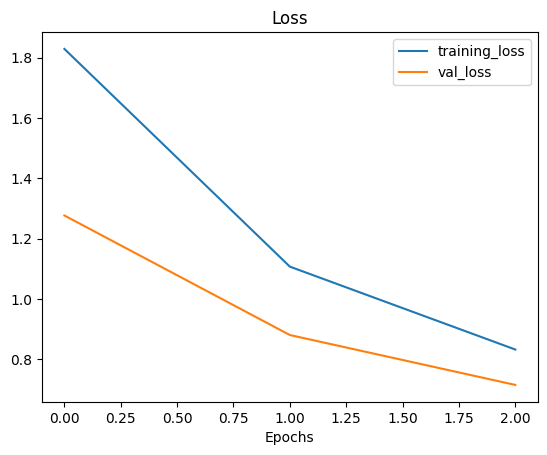

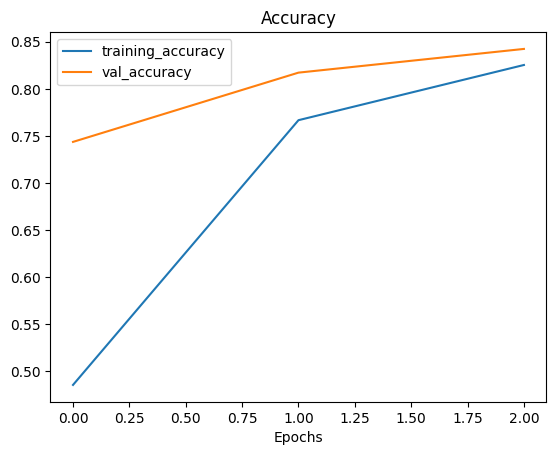

In [ ]:
# Check out our model's training curves
plot_loss_curves(history)

In [17]:

# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [18]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"


--2024-07-23 02:06:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 173.194.216.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   130MB/s    in 1.0s    

2024-07-23 02:06:15 (130 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent, image_size = image_size,
    batch_size = 32, label_mode = 'categorical'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size = image_size,
    label_mode = 'categorical'
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **Adding Data augumentation as a layer to the model**

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name = 'data_augumentation')